# Reliability Diagram

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from utility.unpickle_probs import unpickle_probs
from utility.calibration import get_bin_info, softmax
from os.path import join

from utility.cal_methods import HistogramBinning, TemperatureScaling
from betacal import BetaCalibration
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression


Using TensorFlow backend.


Script for plotting reliability diagrams.

In [2]:
def rel_diagram(accs, confs, M = 10, name = "Reliability Diagram", subplot_nr = 0, show_plot = False):
    
    acc_conf = np.column_stack([accs,confs])
    acc_conf.sort(axis=1)
    outputs = acc_conf[:, 0]
    gap = acc_conf[:, 1]

    bin_size = 1/M
    positions = np.arange(0+bin_size/2, 1+bin_size/2, bin_size)
    
    if subplot_nr != 0:
        plt.subplot(subplot_nr)

    # Plot gap first, so its below everything
    gap_plt = plt.bar(positions, gap, width = bin_size, edgecolor = "red", color = "red", alpha = 0.3, label="Gap", linewidth=2, zorder=2)

    # Next add error lines
    #for i in range(M):
        #plt.plot([i/M,1], [0, (M-i)/M], color = "red", alpha=0.5, zorder=1)

    #Bars with outputs
    output_plt = plt.bar(positions, outputs, width = bin_size, edgecolor = "black", color = "blue", label="Outputs", zorder = 3)

    # Line plot with center line.
    plt.plot([0,1], [0,1], linestyle = "--")


    plt.legend(handles = [gap_plt, output_plt])
    plt.axes().set_aspect('equal')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(name, fontsize = 16)
    plt.xlabel("Confidence", fontsize = 14, color = "black")
    plt.ylabel("Accuracy", fontsize = 14, color = "black")
    plt.grid(True)

    if show_plot:
        plt.show()
        
    return plt.axes()

In [11]:
file = "probs_resnet110_c10_logits.p"
M = 15

bin_info_uncal = get_uncalibrated_res(PATH, file, M)

accs_confs = []

accs_confs.append(cal_res(HistogramBinning, PATH, file, M, "", "single", {'M':M}))
accs_confs.append(cal_res(IsotonicRegression, PATH, file, M, "", "single", {'y_min':0, 'y_max':1}))
accs_confs.append(cal_res(TemperatureScaling, PATH, file, M, "", "multi"))
accs_confs.append(cal_res(BetaCalibration, PATH, file, M, "", "single", {'parameters':"abm"}))

In [12]:
accs_confs

[(([0,
    0,
    0,
    0.0,
    0.23076923076923078,
    0.42857142857142855,
    0.25,
    0.494949494949495,
    0.5795454545454546,
    0.524390243902439,
    0.5733333333333334,
    0.5,
    0.47058823529411764,
    0.46808510638297873,
    0.9574064312071692],
   [0,
    0,
    0,
    0.25679808855056763,
    0.29589794920041013,
    0.36975489343915668,
    0.42772188782691956,
    0.50980450378523934,
    0.57005627859722485,
    0.63397795398060863,
    0.69747835159301763,
    0.75816194755690436,
    0.82274564574746523,
    0.91258729391909665,
    0.96318925758632279],
   [0, 0, 0, 5, 13, 7, 12, 99, 88, 82, 75, 70, 17, 47, 9485]),
  ([0,
    0,
    0,
    1.0,
    0,
    0.5,
    0.375,
    0.46511627906976744,
    0.4897959183673469,
    0.7241379310344828,
    0.6551724137931034,
    0.7878787878787878,
    1.0,
    0.5909090909090909,
    0.9679379715004192],
   [0,
    0,
    0,
    0.24829302728176117,
    0,
    0.38947285711765289,
    0.4320373460650444,
    0.507

In [19]:
accs_confs[0][0]

([0,
  0,
  0,
  0.0,
  0.23076923076923078,
  0.42857142857142855,
  0.25,
  0.494949494949495,
  0.5795454545454546,
  0.524390243902439,
  0.5733333333333334,
  0.5,
  0.47058823529411764,
  0.46808510638297873,
  0.9574064312071692],
 [0,
  0,
  0,
  0.25679808855056763,
  0.29589794920041013,
  0.36975489343915668,
  0.42772188782691956,
  0.50980450378523934,
  0.57005627859722485,
  0.63397795398060863,
  0.69747835159301763,
  0.75816194755690436,
  0.82274564574746523,
  0.91258729391909665,
  0.96318925758632279],
 [0, 0, 0, 5, 13, 7, 12, 99, 88, 82, 75, 70, 17, 47, 9485])

In [26]:
correct_labels = np.asarray(accs_confs[0][0][0])*np.asarray(accs_confs[0][0][2])

In [24]:
elems_in_bin = accs_confs[0][0][2]

In [25]:
elems_in_bin

[0, 0, 0, 5, 13, 7, 12, 99, 88, 82, 75, 70, 17, 47, 9485]

In [36]:
for i in range(len(elems_in_bin)):
    
    elems = int(elems_in_bin[i])
    correct = int(correct_labels[i])
    #np.zeros(elems-correct)

In [46]:
correct

9081

In [42]:
temp = np.concatenate([np.zeros(elems-correct),np.ones(correct)])

In [44]:
temp.shape

(9485,)

In [45]:
np.std(temp)

0.20193899249605357

In [17]:
np.std([1,1,1,0,0,0,0,0,0,0,0,0,0])

0.42132504423474321

In [16]:
np.std([1,1,1,0,0,0,0])

0.49487165930539351

In [ ]:
def plot_bin_dist(bin_info, ax = None, M = 10, name = "Distributions", yname = "% of Samples", show_plot = False):
    
    accs = np.asarray(bin_info[0])
    confs = np.asarray(bin_info[1])
    lens = np.asarray(bin_info[2])
    lens = lens/sum(lens)  # Normalized
    
    avg_acc = np.sum(accs*lens)/np.sum(lens)
    avg_conf = np.sum(confs*lens)/np.sum(lens)

    bin_size = 1/M
    positions = np.arange(0+bin_size/2, 1+bin_size/2, bin_size)

    #Bars with outputs
    dist = ax.bar(positions, lens, width = bin_size, edgecolor = "black", color = "blue", zorder = 3)

    # Line plot with average accuracy.
    #plt.plot([avg_acc,avg_acc], [0,1], linestyle = "--", zorder = 5, color = "gray")
    #plt.plot([avg_conf,avg_conf], [0,1], linestyle = "--", zorder = 5, color = "gray")


    ax.set_aspect('equal')

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(name, fontsize=24)
    ax.set_xlabel("Confidence", fontsize=22, color = "black")
    ax.set_ylabel(yname, fontsize=22, color = "black")


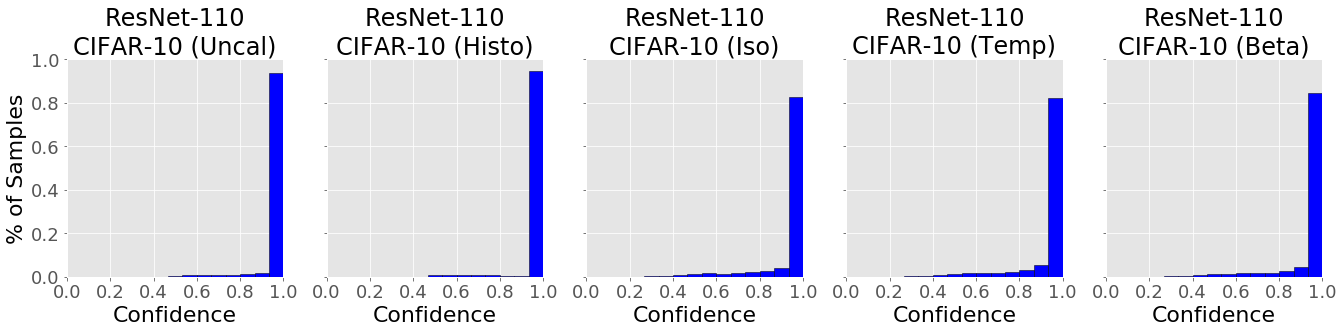

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(22.5, 4), sharex='col', sharey='row')
names = [" (Uncal)", " (Histo)", " (Iso)", " (Temp)", " (Beta)"]
plot_name = "ResNet-110 CIFAR-10"

# Uncal plot
plot_bin_dist(bin_info_uncal, ax[0], M=15, name = "\n".join(plot_name.split()) + names[0])

# Calibrated plots
for i, bin_info in enumerate(accs_confs):
    plot_bin_dist(bin_info[0], ax[i+1], M=15, name = "\n".join(plot_name.split()) + names[i+1], yname = "")
    
for ax_temp in ax:    
    plt.setp(ax_temp.get_xticklabels(), rotation='horizontal', fontsize=18)
    plt.setp(ax_temp.get_yticklabels(), fontsize=18)

    
plt.savefig("_".join(plot_name.split()) + "_dist.pdf", format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Load in the data

In [10]:
PATH = join('..', '..', 'Semester IV', 'NN_image_probs')
files = (
        #'probs_resnet110_c10_logits.p', 'probs_resnet110_c100_logits.p', 
         #'probs_densenet40_c10_logits.p', 'probs_densenet40_c100_logits.p',
        #'probs_resnet_wide32_c10_logits.p', 'probs_resnet_wide32_c100_logits.p',
         #'probs_resnet50_birds_logits.p', 
        'probs_resnet110_SD_c10_logits.p', 'probs_resnet110_SD_c100_logits.p', 
         #'probs_resnet152_SD_SVHN_logits.p',
        #'probs_resnet152_imgnet_logits.p', 'probs_densenet161_imgnet_logits.p'
        )

FILE_PATH = join(PATH, files[0])
#(y_probs_val, y_val), (y_probs_test, y_test) = unpickle_probs(FILE_PATH, True)
(y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH, True)

y_probs_val: (5000, 10)
y_true_val: (5000, 1)
y_probs_test: (10000, 10)
y_true_test: (10000, 1)


In [8]:
y_probs = softmax(y_logits_val)
y_preds = np.argmax(y_probs, axis=1)
y_conf = np.max(y_probs, axis=1)

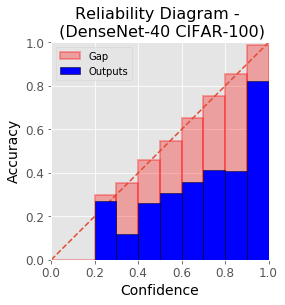

In [248]:
accs, confs, len_bins = get_bin_info(y_conf, y_preds, y_val, bin_size = 0.1)

ax = rel_diagram(accs, confs, M = 10, name = "Reliability Diagram - \n (DenseNet-40 CIFAR-100)")


plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)

#plt.savefig("Example_rel.png", dpi=1000, bbox_inches='tight', pad_inches=0.2)
plt.savefig("Example_rel.pdf", format="pdf", dpi=1000, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [4]:
# reliability diagram plotting for subplot case.
def rel_diagram_sub(accs, confs, ax, M = 10, name = "Reliability Diagram", xname = "", yname=""):

    acc_conf = np.column_stack([accs,confs])
    acc_conf.sort(axis=1)
    outputs = acc_conf[:, 0]
    gap = acc_conf[:, 1]

    bin_size = 1/M
    positions = np.arange(0+bin_size/2, 1+bin_size/2, bin_size)

    # Plot gap first, so its below everything
    gap_plt = ax.bar(positions, gap, width = bin_size, edgecolor = "red", color = "red", alpha = 0.3, label="Gap", linewidth=2, zorder=2)

    # Next add error lines
    #for i in range(M):
        #plt.plot([i/M,1], [0, (M-i)/M], color = "red", alpha=0.5, zorder=1)

    #Bars with outputs
    output_plt = ax.bar(positions, outputs, width = bin_size, edgecolor = "black", color = "blue", label="Outputs", zorder = 3)

    # Line plot with center line.
    ax.set_aspect('equal')
    ax.plot([0,1], [0,1], linestyle = "--")
    ax.legend(handles = [gap_plt, output_plt])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(name, fontsize=24)
    ax.set_xlabel(xname, fontsize=22, color = "black")
    ax.set_ylabel(yname, fontsize=22, color = "black")

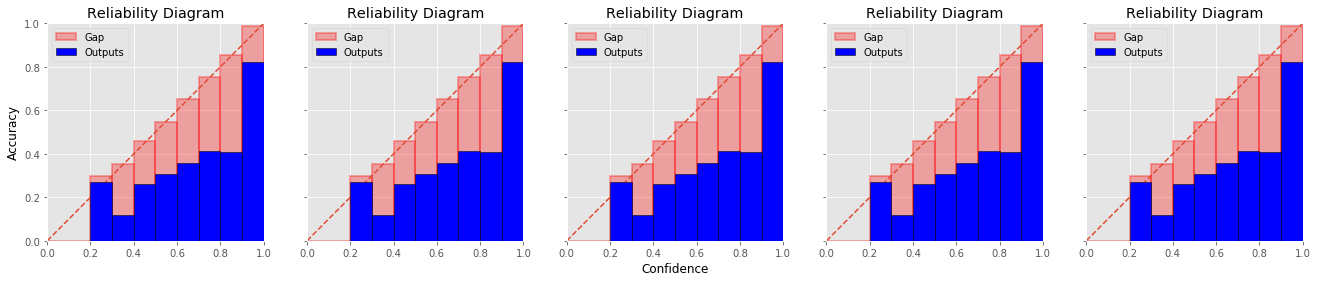

In [7]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(22.5, 4), sharex='col', sharey='row')

for i in range(5):
    rel_diagram_sub(accs, confs, ax[i] , M = 10, name = "Reliability Diagram")
    
ax[0].set_ylabel("Accuracy", color = "black")
ax[2].set_xlabel("Confidence", size = 12, color = "black")

plt.show()


In [5]:
def get_pred_conf(y_probs, normalize = False):
    
    y_preds = np.argmax(y_probs, axis=1)  # Take maximum confidence as prediction
    
    if normalize:
        y_confs = np.max(y_probs, axis=1)/np.sum(y_probs, axis=1)
    else:
        y_confs = np.max(y_probs, axis=1)  # Take only maximum confidence
        
    return y_preds, y_confs

## Calibration methods for both 1-vs-rest and mutliclass approach

In [6]:
# calibrated results in 1-vs-all manner
def cal_res(method, path, file, M = 15, name = "", approach = "single", m_kwargs = {}):
    
    bin_size = 1/M

    FILE_PATH = join(path, file)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_val = softmax(y_logits_val)  # Softmax logits
    y_probs_test = softmax(y_logits_test)
    
    if approach == "single":
        
        K = y_probs_test.shape[1]

        # Go through all the classes
        for k in range(K):
            # Prep class labels (1 fixed true class, 0 other classes)
            y_cal = np.array(y_val == k, dtype="int")[:, 0]

            # Train model
            model = method(**m_kwargs)
            model.fit(y_probs_val[:, k], y_cal) # Get only one column with probs for given class "k"

            y_probs_val[:, k] = model.predict(y_probs_val[:, k])  # Predict new values based on the fittting
            y_probs_test[:, k] = model.predict(y_probs_test[:, k])

            # Replace NaN with 0, as it should be close to zero  # TODO is it needed?
            idx_nan = np.where(np.isnan(y_probs_test))
            y_probs_test[idx_nan] = 0

            idx_nan = np.where(np.isnan(y_probs_val))
            y_probs_val[idx_nan] = 0
            
            y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = True)
            y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = True)
    
    else:
        model = method(**m_kwargs)
        model.fit(y_logits_val, y_val)

        y_probs_val = model.predict(y_logits_val) 
        y_probs_test = model.predict(y_logits_test)

        y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = False)
        y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    

    
    accs_val, confs_val, len_bins_val = get_bin_info(y_confs_val, y_preds_val, y_val, bin_size = bin_size)
    accs_test, confs_test, len_bins_test = get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)
    
    return (accs_test, confs_test, len_bins_test), (accs_val, confs_val, len_bins_val)
    

In [7]:
def get_uncalibrated_res(path, file, M = 15):
    
    bin_size = 1/M

    FILE_PATH = join(path, file)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_test = softmax(y_logits_test)
    y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    
    return get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)



In [8]:
import pickle

def gen_plots(files, plot_names =  [], M = 15, val_set = False):
    
    if val_set:  # Plot Reliability diagrams for validation set
        k = 1
    else:
        k = 0

    for i, file in enumerate(files):
        
        bin_info_uncal = get_uncalibrated_res(PATH, file, M)

        accs_confs = []

        accs_confs.append(cal_res(TemperatureScaling, PATH, file, M, "", "multi"))
        accs_confs.append(cal_res(HistogramBinning, PATH, file, M, "", "single", {'M':M}))
        accs_confs.append(cal_res(IsotonicRegression, PATH, file, M, "", "single", {'y_min':0, 'y_max':1}))
        accs_confs.append(cal_res(BetaCalibration, PATH, file, M, "", "single", {'parameters':"abm"}))
        
        with open(plot_names[i] + "_bin_info.p", "wb") as f:
            pickle.dump(accs_confs, f)

        plt.style.use('ggplot')
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(22.5, 4), sharex='col', sharey='row')
        names = [" (Uncal)", " (Temp)", " (Histo)", " (Iso)", " (Beta)"]
        
        # Uncalibrated information
        rel_diagram_sub(bin_info_uncal[0], bin_info_uncal[1], ax[0] , M = M, name = "\n".join(plot_names[i].split()) + names[0], xname="Confidence")

        for j in range(4):
            rel_diagram_sub(accs_confs[j][k][0], accs_confs[j][k][1], ax[j+1] , M = M, name = "\n".join(plot_names[i].split()) + names[j+1], xname="Confidence")

        ax[0].set_ylabel("Accuracy", color = "black")
        
        for ax_temp in ax:    
            plt.setp(ax_temp.get_xticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax_temp.get_yticklabels(), fontsize=18)

        plt.savefig("_".join(plot_names[i].split()) + ".pdf", format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.2)
        plt.show()

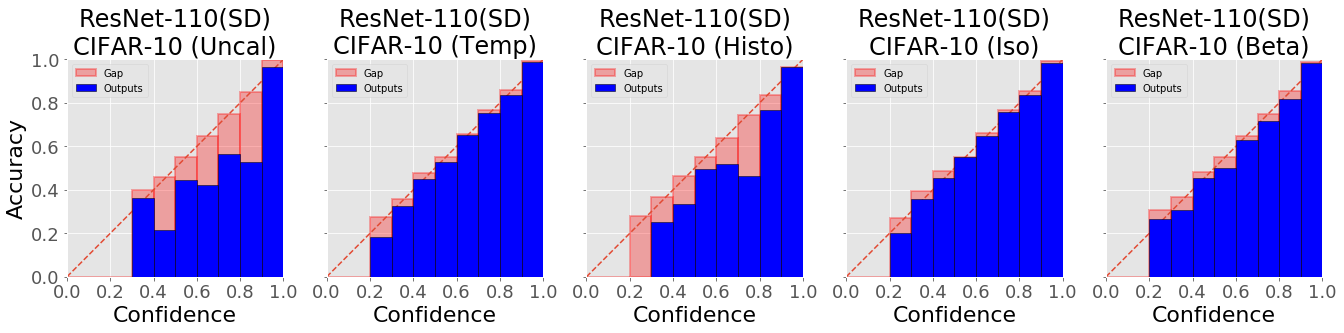

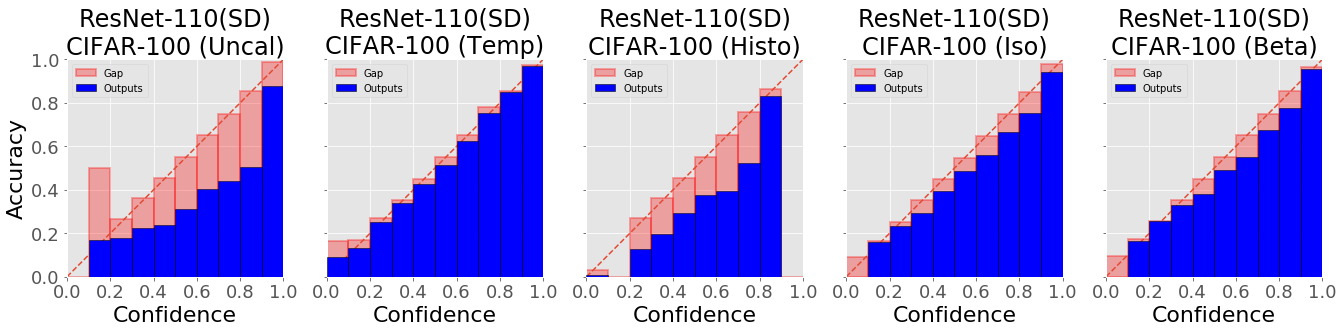

In [29]:
gen_plots(files, plot_names = ["ResNet-110(SD) CIFAR-10", "ResNet-110(SD) CIFAR-100", 
                               #"DenseNet-40 CIFAR-10", "DenseNet-40 CIFAR-100", 
                               #"WideNet-32 CIFAR-10", "WideNet-32 CIFAR-100", 
                               #"ResNet-50 Birds", "ResNet-110(SD) CIFAR-10",
                               #"ResNet-110(SD) CIFAR-100",
                              #"ResNet-152(SD) SVHN",
                              #"ResNet-152 ImageNet", "DenseNet-161 ImageNet"
                               ], M = 10, val_set=False)

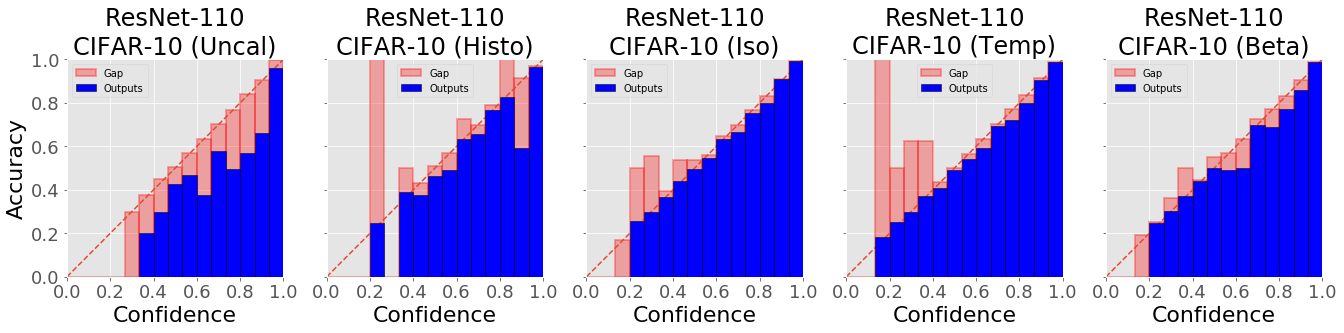

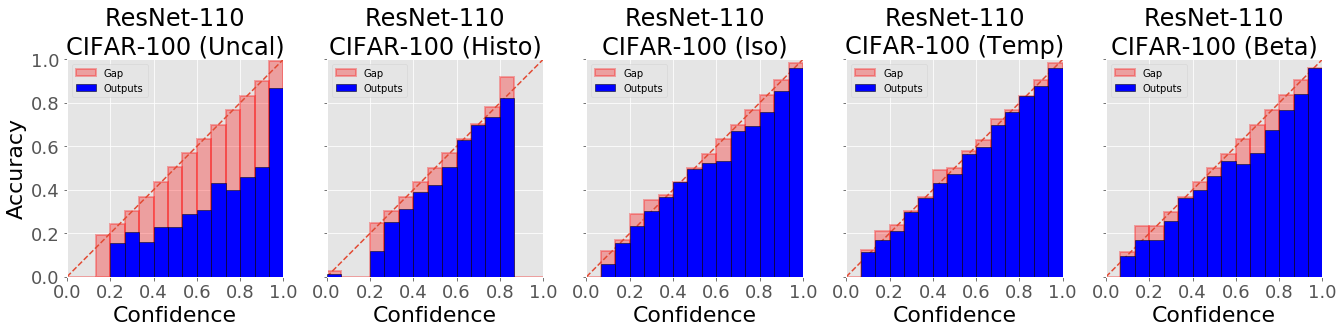

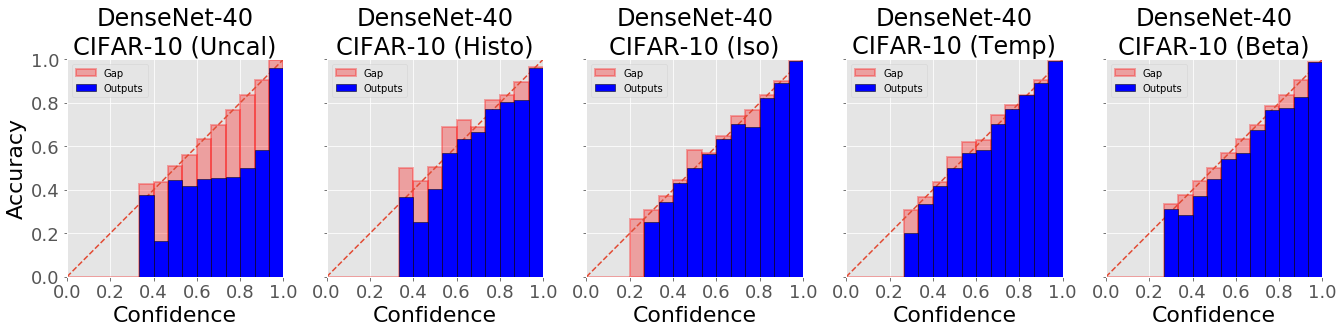

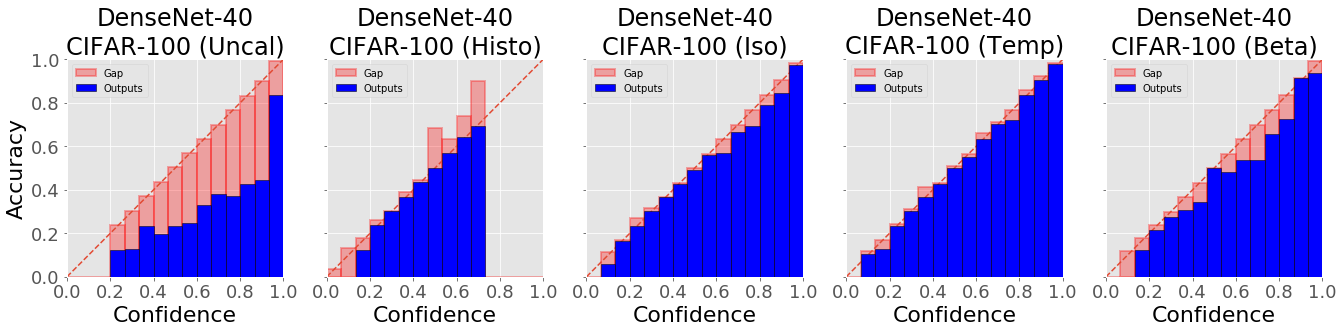

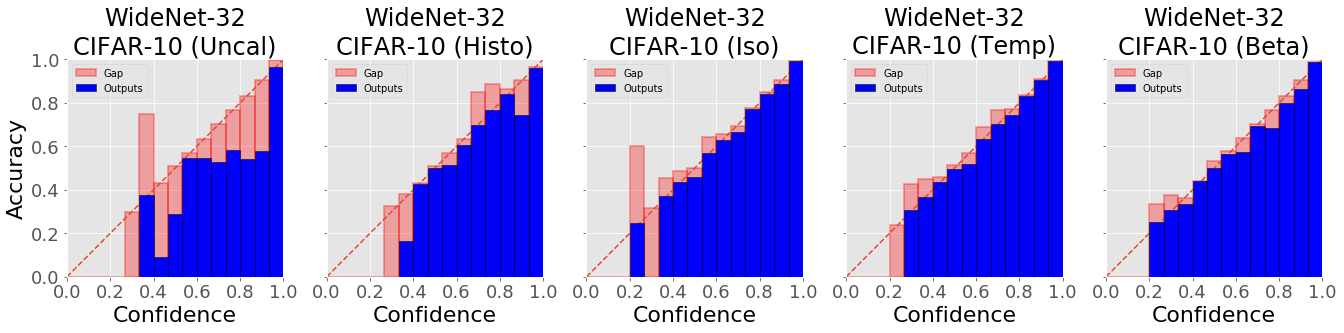

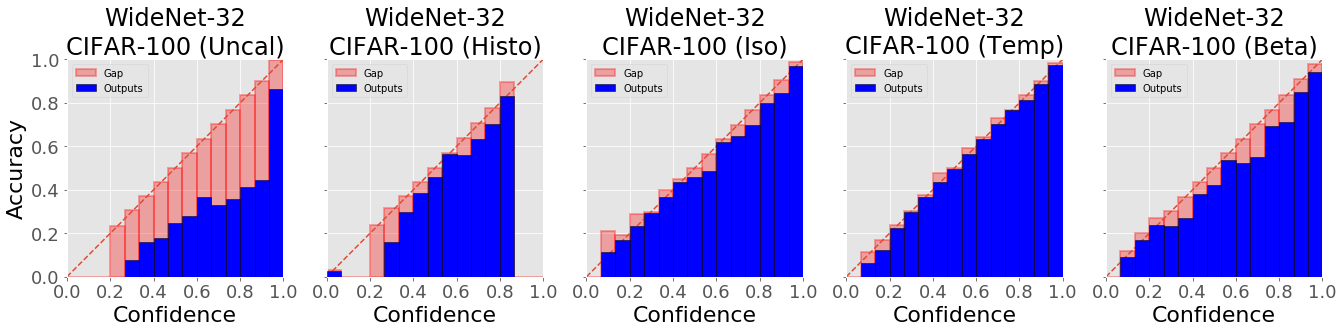

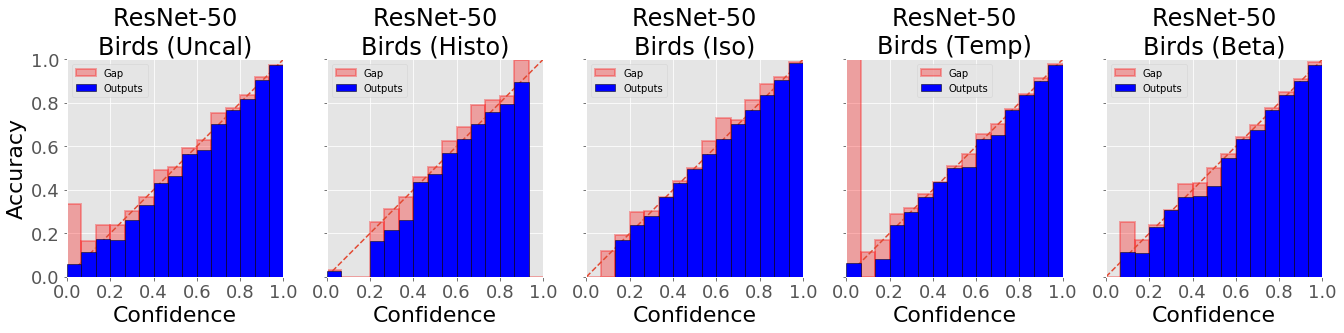

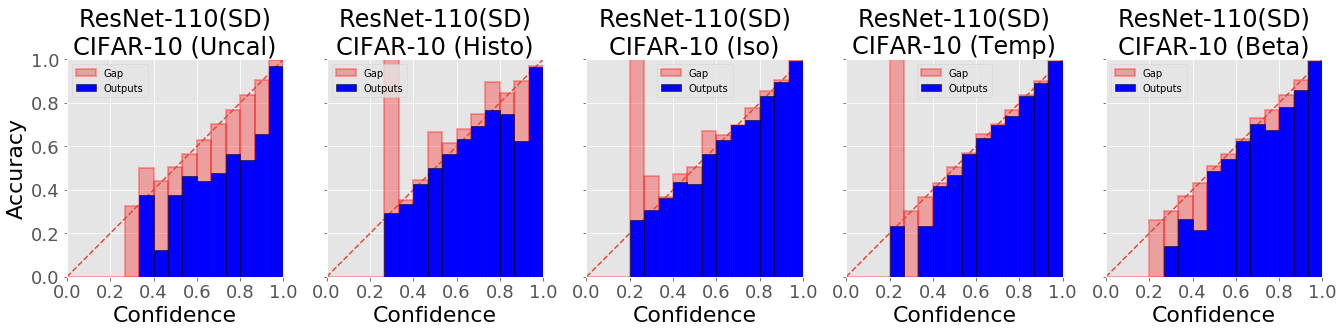

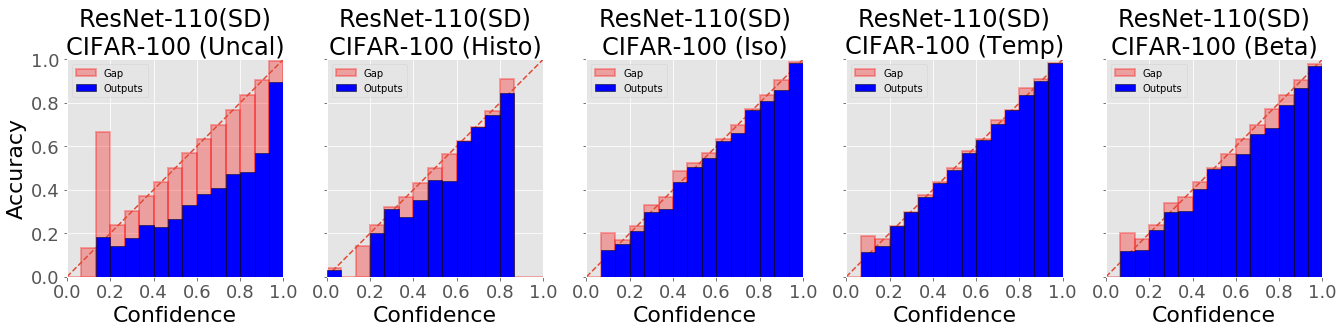

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\Semester IV\\NN_image_probs\\probs_resnet152_SD_SVHN_logits.pprobs_resnet152_imgnet_logits.p'

In [251]:
gen_plots(files, plot_names = ["ResNet-110 CIFAR-10", "ResNet-110 CIFAR-100", 
                               #"DenseNet-40 CIFAR-10", "DenseNet-40 CIFAR-100", 
                               #"WideNet-32 CIFAR-10", "WideNet-32 CIFAR-100", 
                               #"ResNet-50 Birds", "ResNet-110(SD) CIFAR-10",
                               #"ResNet-110(SD) CIFAR-100",
                              #"ResNet-152(SD) SVHN",
                              #"ResNet-152 ImageNet", "DenseNet-161 ImageNet"
                               ], val_set = True)

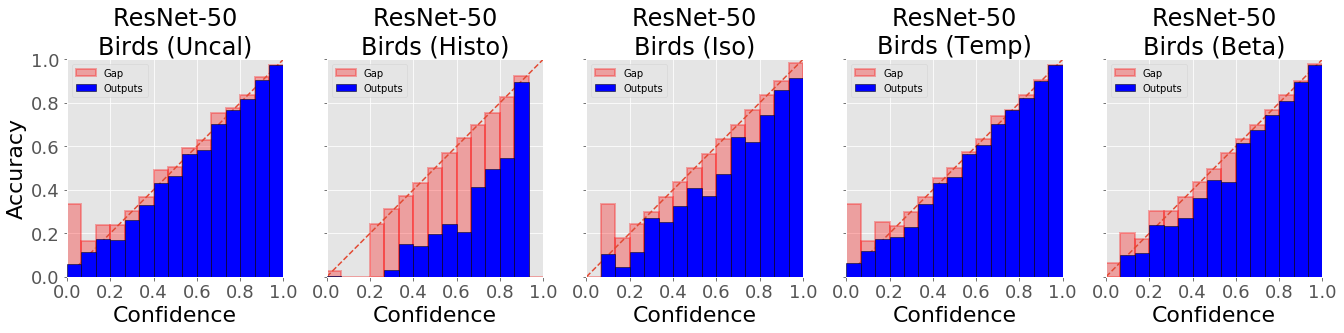

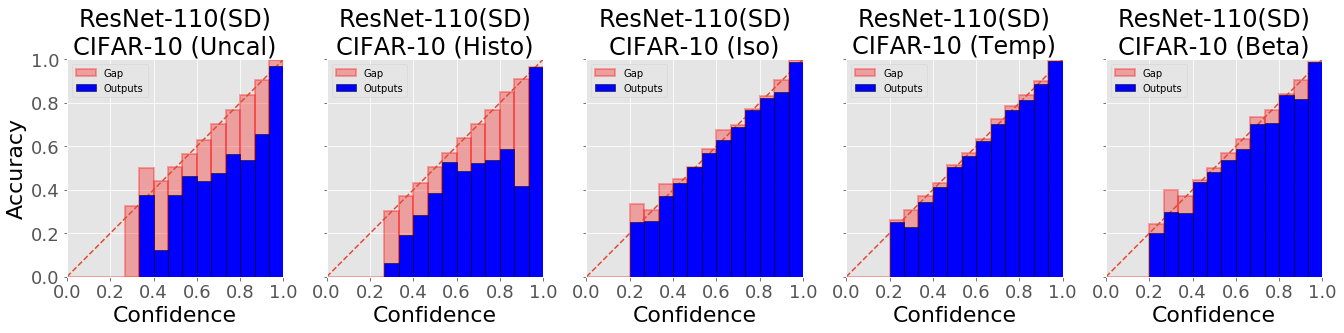

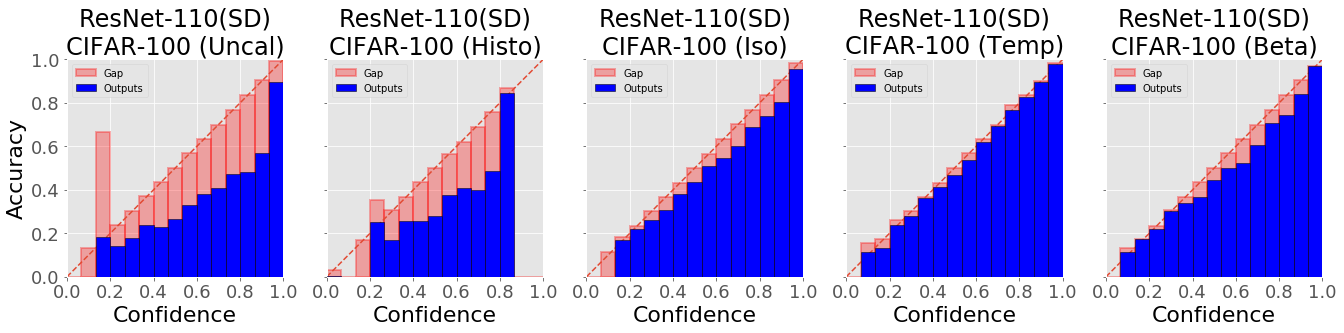

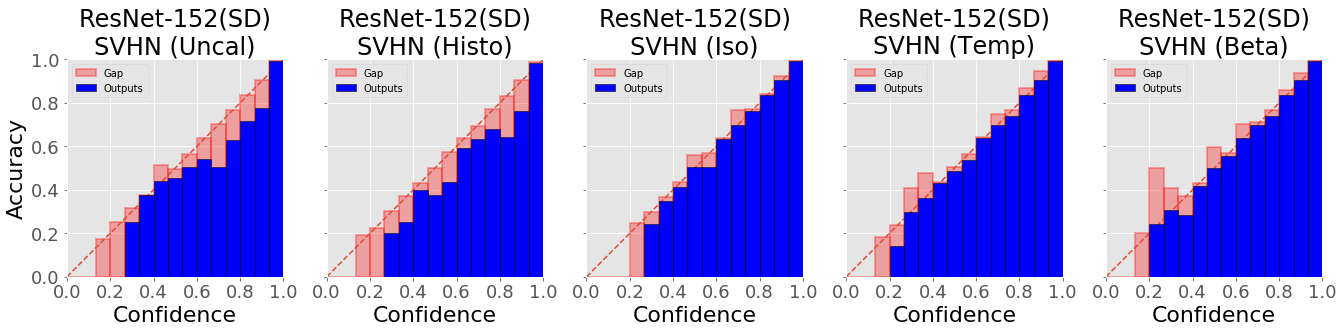

In [197]:
files = ("probs_resnet50_birds_logits.p", "probs_resnet110_SD_c10_logits.p", "probs_resnet110_SD_c100_logits.p", "probs_resnet152_SD_SVHN_logits.p")

gen_plots(files, plot_names = ["ResNet-50 Birds", "ResNet-110(SD) CIFAR-10",
                               "ResNet-110(SD) CIFAR-100", 
                               "ResNet-152(SD) SVHN"])